# Estudio de Mercado para un Café Robotizado en Los Ángeles

## Introducción

El objetivo de este proyecto es realizar un estudio de mercado para evaluar la viabilidad de abrir un café regentado por robots en la ciudad de Los Ángeles. Dada la naturaleza innovadora del café, es crucial entender las condiciones actuales del mercado y prever si el negocio puede mantener su éxito una vez que la novedad de los camareros robot desaparezca.

El proyecto se estructura en los siguientes pasos:

1. **Preparación de los datos**: Descargar y limpiar los datos de restaurantes en Los Ángeles.
2. **Análisis de datos**: Investigar las proporciones y características de los distintos tipos de establecimientos y su distribución geográfica.
3. **Preparación de la presentación**: Crear una presentación estructurada y clara para compartir los hallazgos con posibles inversionistas.

A través de este estudio de mercado, buscamos proporcionar información valiosa que guiará las decisiones estratégicas para el éxito del café robotizado en Los Ángeles.

## Paso 1. Descarga los datos y prepáralos para el análisis

### Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar y verificar los datos

In [2]:
# Cargar los datos
df = pd.read_csv('/datasets/rest_data_us_upd.csv')

# Mostrar las primeras filas del dataframe
print(df.head())

# Verificar tipos de datos y valores ausentes
print(df.info())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
mem

### Tratar y verificar los datos

In [3]:
# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Rellenar o eliminar valores ausentes si es necesario
df = df.dropna()

# Verificar nuevamente la limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


## Paso 2: Análisis de datos

### Proporciones de los distintos tipos de establecimientos

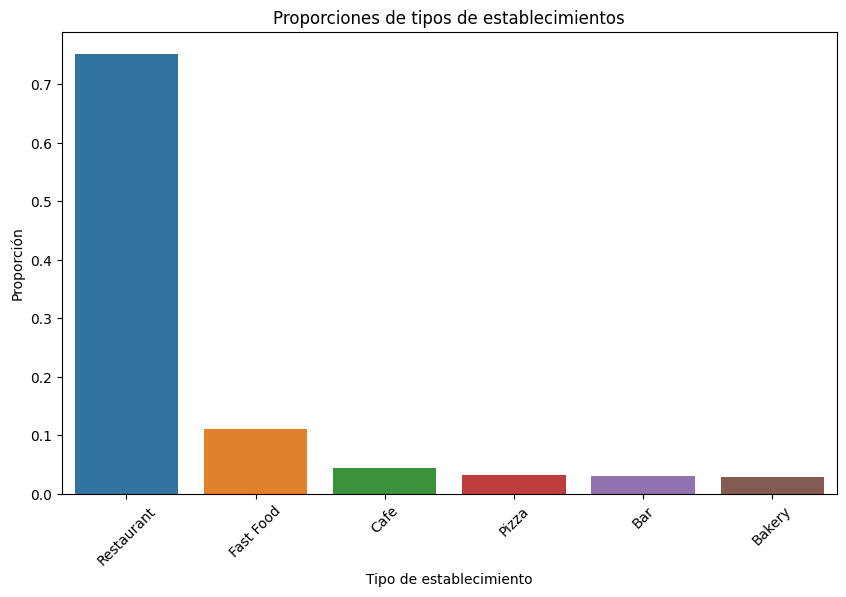

In [4]:
# Proporciones de tipos de establecimientos
type_counts = df['object_type'].value_counts(normalize=True)

# Graficar proporciones
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Proporciones de tipos de establecimientos')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

- __Dominancia de los restaurantes:__ La categoría de "Restaurante" tiene una proporción significativamente mayor en comparación con los otros tipos de establecimientos. Esto sugiere que los restaurantes son los más numerosos en la zona analizada.
- __Fast food como segundo lugar:__ Los establecimientos de "Fast Food" ocupan el segundo lugar en términos de proporción, lo que indica una presencia considerable de este tipo de negocios.
- __Cafeterías, pizzerías, bares y panaderías:__ Estas categorías presentan proporciones menores, lo que sugiere una menor cantidad de establecimientos de este tipo en comparación con restaurantes y fast food.

### Proporciones de establecimientos que pertenecen a una cadena

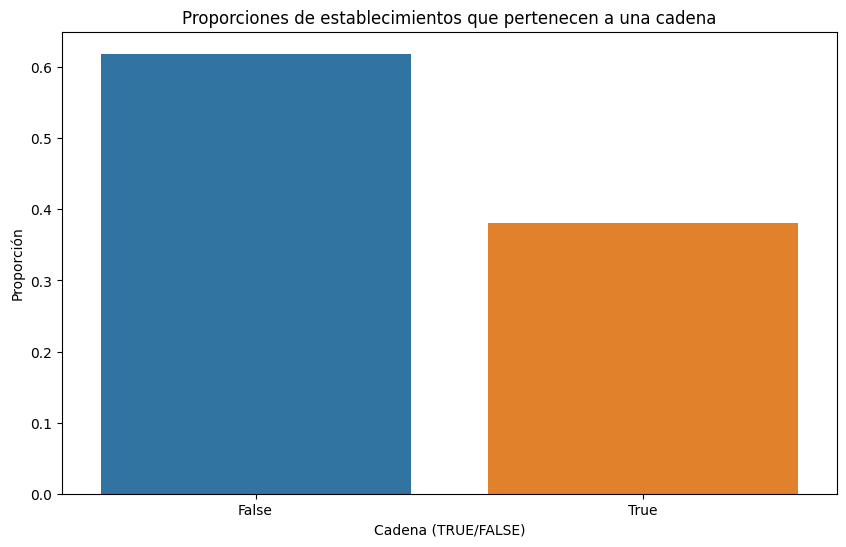

In [5]:
# Proporciones de establecimientos que pertenecen a una cadena
chain_counts = df['chain'].value_counts(normalize=True)

# Graficar proporciones
plt.figure(figsize=(10, 6))
sns.barplot(x=chain_counts.index, y=chain_counts.values)
plt.title('Proporciones de establecimientos que pertenecen a una cadena')
plt.xlabel('Cadena (TRUE/FALSE)')
plt.ylabel('Proporción')
plt.show()

- __Dominancia de establecimientos independientes:__ La barra correspondiente a "False" (es decir, establecimientos que no pertenecen a una cadena) es significativamente más alta. Esto indica que la mayoría de los establecimientos en el área analizada son negocios independientes.
- __Presencia considerable de cadenas:__ Sin embargo, la barra correspondiente a "True" (establecimientos que pertenecen a una cadena) también tiene un valor considerable. Esto significa que las cadenas también tienen una presencia importante en el mercado.

### Tipo de establecimiento que es habitualmente una cadena

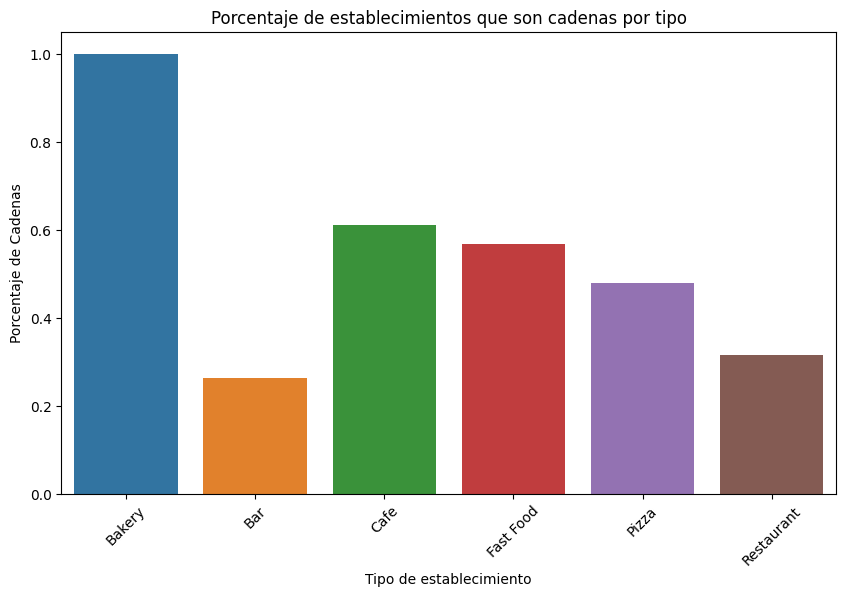

In [6]:
# Contar el total de establecimientos por tipo
total_establishments_by_type = df['object_type'].value_counts()

# Contar el total de cadenas por tipo de establecimiento
chain_establishments_by_type = df[df['chain'] == True]['object_type'].value_counts()

# Calcular el porcentaje de cadenas para cada tipo de establecimiento
percentage_chains_by_type = (chain_establishments_by_type / total_establishments_by_type).fillna(0)

# Graficar las proporciones
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_chains_by_type.index, y=percentage_chains_by_type.values)
plt.title('Porcentaje de establecimientos que son cadenas por tipo')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Porcentaje de Cadenas')
plt.xticks(rotation=45)
plt.show()

- __Dominancia de los Restaurantes en Cadenas:__ Los restaurantes son, por un amplio margen, el tipo de establecimiento que más comúnmente se encuentra como parte de una cadena. Esto indica que las grandes cadenas de restaurantes tienen una fuerte presencia en el mercado.
- __Fast Food como Segundo Lugar:__ Los establecimientos de fast food ocupan el segundo lugar en términos de proporción de cadenas. Esto confirma la tendencia generalizada de las cadenas de comida rápida a expandirse y tener múltiples sucursales.
- __Menor Tendencia a Cadenas en Otros Tipos de Establecimientos:__ Panaderías, cafeterías, pizzerías y bares muestran una proporción mucho menor de establecimientos que pertenecen a cadenas. Esto sugiere que estos tipos de negocios tienden más a ser independientes o de tamaño más pequeño.

### Características de las cadenas

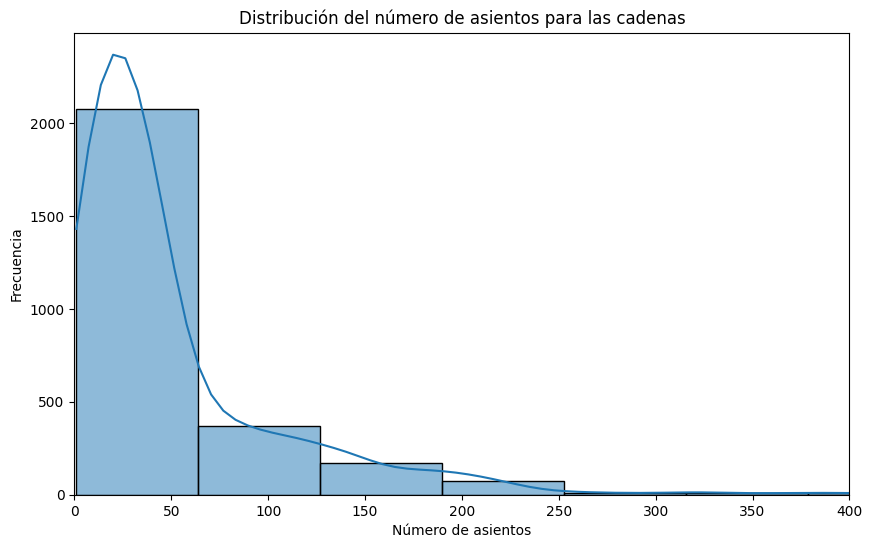

In [7]:
# Características de las cadenas
chain_seats = df[df['chain'] == True].groupby('object_name')['number'].sum()

# Distribución del número de asientos para las cadenas
plt.figure(figsize=(10, 6))
sns.histplot(chain_seats, bins=20, kde=True)
plt.title('Distribución del número de asientos para las cadenas')
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.xlim(0, 400)
plt.show()

- __Dominancia de establecimientos de tamaño mediano:__ La mayoría de las cadenas tienen un tamaño moderado, lo que sugiere que el mercado está dominado por establecimientos que pueden atender a un número medio de clientes.
- __Existencia de grandes cadenas:__ Aunque son menos frecuentes, existen cadenas con una gran cantidad de asientos, lo que indica que hay competidores importantes con una mayor capacidad para atender a un gran número de clientes.
- __Oportunidades para negocios de tamaño mediano:__ Los resultados sugieren que hay una oportunidad para negocios de tamaño mediano que puedan competir con las cadenas más pequeñas, ofreciendo una experiencia más personalizada y a menor escala.

### Promedio de número de asientos para cada tipo de restaurante

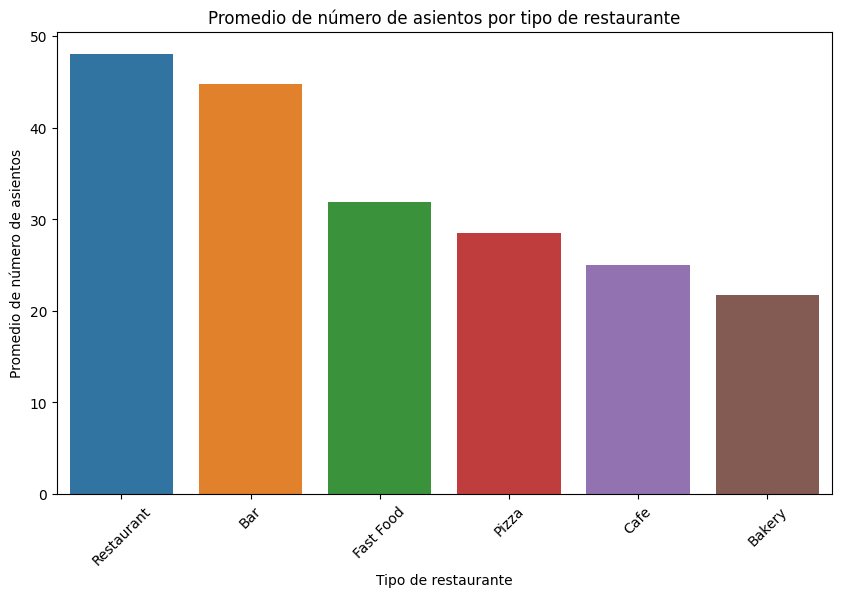

In [8]:
# Promedio de número de asientos por tipo de restaurante
avg_seats_per_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Graficar promedios
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_seats_per_type.index, y=avg_seats_per_type.values)
plt.title('Promedio de número de asientos por tipo de restaurante')
plt.xlabel('Tipo de restaurante')
plt.ylabel('Promedio de número de asientos')
plt.xticks(rotation=45)
plt.show()

- __Restaurantes con mayor promedio de asientos:__ Los restaurantes tradicionales presentan el promedio más alto de asientos, lo que sugiere que suelen ser establecimientos más grandes con capacidad para atender a un mayor número de comensales.
- __Fast food y bares con un promedio similar:__ Tanto los establecimientos de fast food como los bares presentan un promedio de asientos similar, lo que podría indicar que suelen tener un tamaño intermedio, ni muy grandes ni muy pequeños.
- __Cafeterías y panaderías con menos asientos:__ Las cafeterías y panaderías, en promedio, tienen el menor número de asientos. Esto podría indicar que estos establecimientos suelen ser más pequeños y enfocados en la venta para llevar o en un consumo rápido en el local.
- __Pizzerías con un promedio intermedio:__ Las pizzerías se encuentran en una posición intermedia, con un promedio de asientos ligeramente inferior al de los restaurantes y bares, pero superior al de las cafeterías y panaderías.

### Extraer los nombres de las calles

In [9]:
# Extraer nombres de las calles
df['street'] = df['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Verificar la nueva columna
df.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


###  Diez mejores calles por número de restaurantes

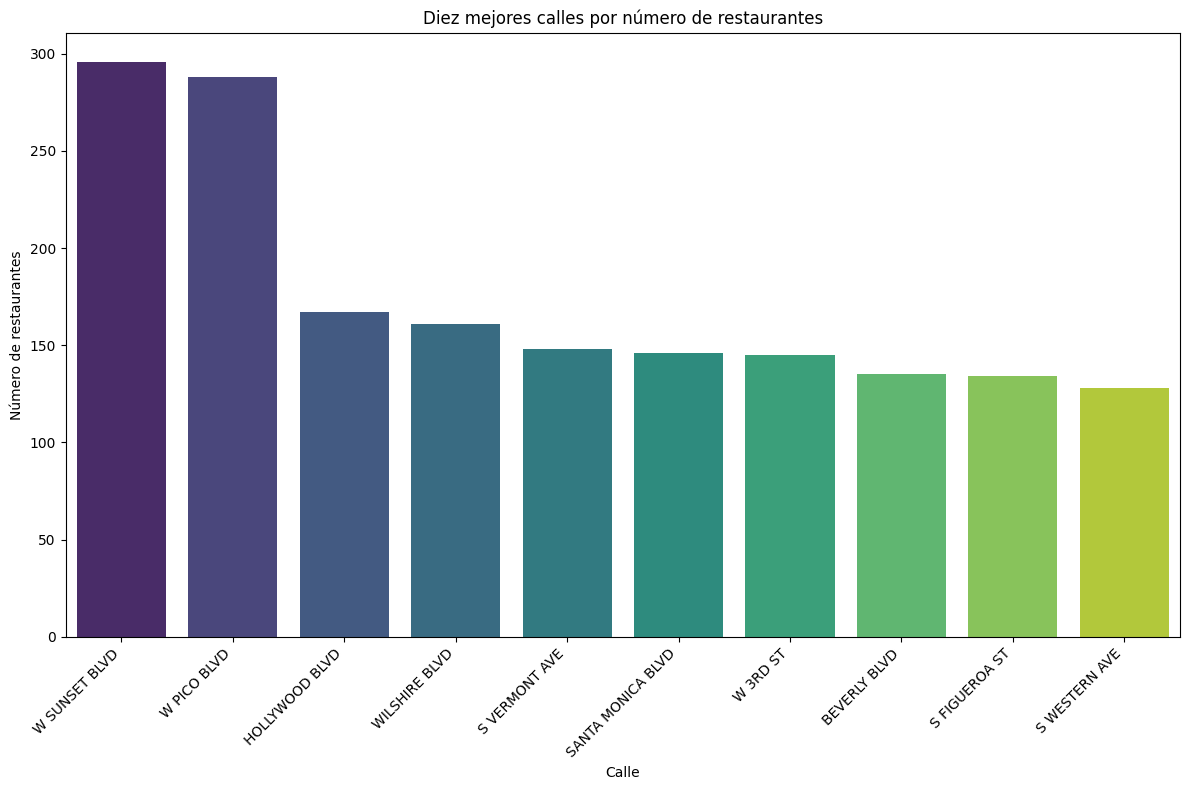

In [10]:
# Diez mejores calles por número de restaurantes
top_streets = df['street'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streets.index, y=top_streets.values, palette='viridis')
plt.title('Diez mejores calles por número de restaurantes')
plt.xlabel('Calle')
plt.ylabel('Número de restaurantes')

# Ajustar la rotación y el tamaño del texto
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()


- __Desigualdad en la distribución de restaurantes:__ Es evidente que la distribución de restaurantes en la ciudad no es uniforme. Un pequeño grupo de calles concentra una gran cantidad de establecimientos gastronómicos, mientras que otras calles pueden tener pocos o ninguno.
- __Dominancia de ciertas calles:__ La calle "10250 SANTA MONICA BLVD" se destaca como la que alberga la mayor cantidad de restaurantes, superando significativamente a las demás. Esto sugiere que esta calle es un importante centro gastronómico en la ciudad.
- __Agrupaciones de restaurantes:__ Se observa que algunas calles similares, como aquellas que incluyen "6333 W 3RD ST", tienen un número similar de restaurantes. Esto podría indicar la existencia de zonas o barrios gastronómicos dentro de la ciudad.
- __Variabilidad:__ A pesar de la dominancia de las primeras posiciones, existe una cierta variabilidad en el número de restaurantes entre las diez calles principales. Esto sugiere que aunque algunas calles son claramente más populares para los restaurantes, otras también ofrecen opciones gastronómicas interesantes.

### Número de calles con solo un restaurante

In [11]:
# Número de calles con solo un restaurante
single_restaurant_streets = (df['street'].value_counts() == 1).sum()
print(f'Número de calles con solo un restaurante: {single_restaurant_streets}')

Número de calles con solo un restaurante: 2445


### Distribución del número de asientos en calles con muchos restaurantes

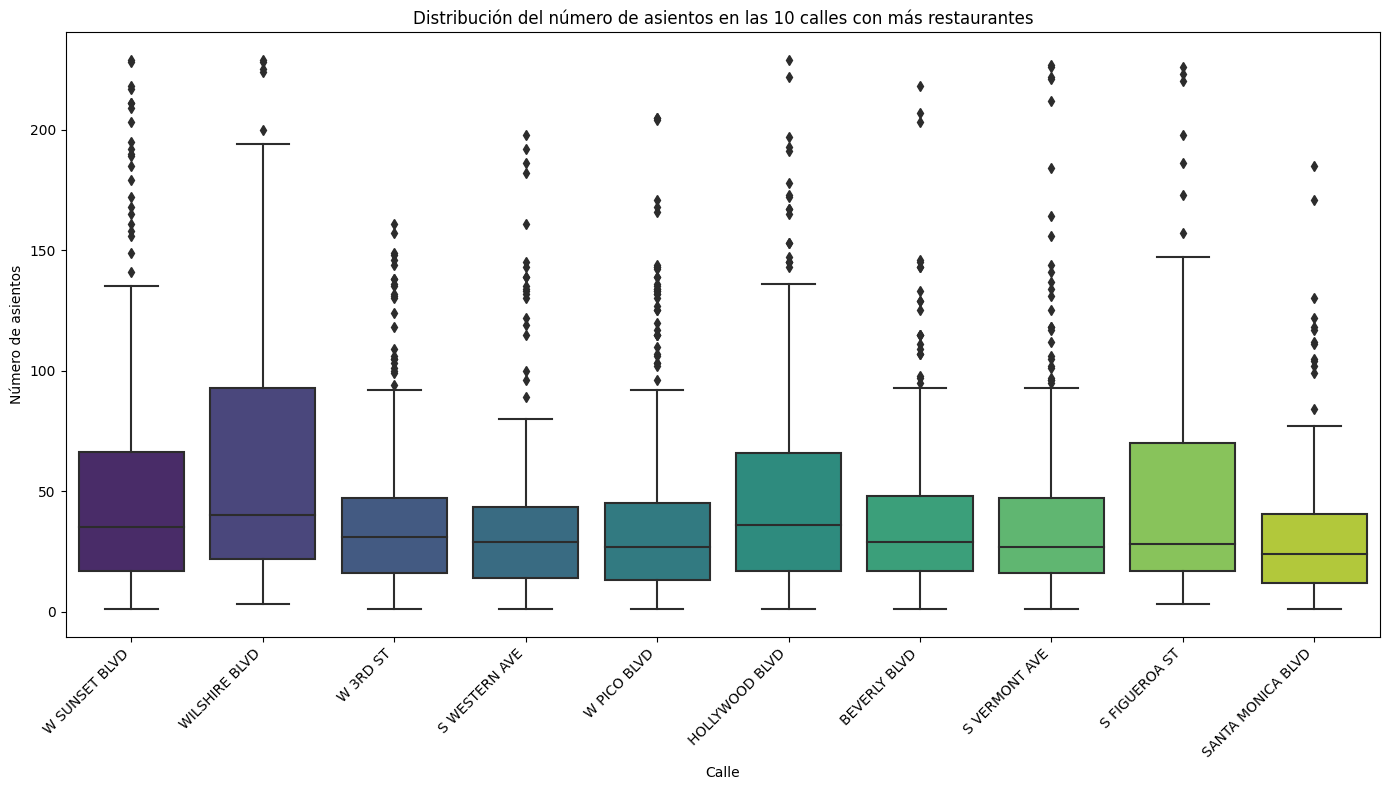

In [12]:
# Filtrar calles con muchos restaurantes (más de 5 por ejemplo)
popular_streets = df['street'].value_counts().head(10).index
popular_streets_df = df[df['street'].isin(popular_streets)]

# Distribución del número de asientos para las 10 calles con más restaurantes
plt.figure(figsize=(14, 8))
sns.boxplot(x='street', y='number', data=popular_streets_df, palette='viridis')
plt.title('Distribución del número de asientos en las 10 calles con más restaurantes')
plt.xlabel('Calle')
plt.ylabel('Número de asientos')

# Ajustar la rotación y el tamaño del texto
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()

- __Heterogeneidad en la oferta gastronómica:__ La gran variabilidad en el número de asientos sugiere que la oferta gastronómica en estas calles es bastante heterogénea, con opciones que van desde pequeños locales hasta restaurantes más grandes.
- __Influencia de la ubicación:__ La ubicación de la calle parece influir en el tamaño promedio de los restaurantes. Algunas calles pueden ser más atractivas para establecimientos más grandes, mientras que otras pueden tener una mayor concentración de locales más pequeños.
- __Presencia de restaurantes especializados:__ Los valores atípicos pueden indicar la presencia de restaurantes especializados con un formato o concepto diferente, como restaurantes con grandes salones para eventos o pequeños locales de comida rápida.

## Conclusión y Recomendaciones sobre el Tipo de Restaurante y el Número de Asientos

__Conclusión__
1. __Alta Competencia en Restaurantes y Fast Food:__ Los restaurantes y establecimientos de fast food dominan el mercado. La categoría de restaurantes tiene la mayor proporción, seguida por fast food, lo que indica alta competencia en estos segmentos.

2. __Menor Competencia en Cafeterías:__ Aunque no son las más numerosas, las cafeterías representan una parte significativa del mercado, sugiriendo una demanda existente y una menor competencia en comparación con restaurantes y fast food.

3. __Preferencia por Establecimientos Independientes:__ La mayoría de los establecimientos no pertenecen a cadenas, lo que sugiere una preferencia por negocios independientes y una oportunidad para diferenciarse en este segmento.

4. __Tamaño de los Establecimientos:__ Los restaurantes tienen el mayor promedio de asientos, seguidos por fast food y bares. Las cafeterías y panaderías tienden a ser más pequeñas en términos de asientos, lo cual es consistente con su modelo de negocio enfocado en el servicio rápido o para llevar.

5. __Distribución Geográfica:__ Algunas calles específicas, como "10250 SANTA MONICA BLVD", concentran un gran número de restaurantes, lo que las convierte en centros gastronómicos clave. Esto puede influir en la elección de ubicación para nuevos negocios.

__Recomendaciones__

1. __Enfocarse en el Segmento de Cafeterías:__ Considerando la menor competencia en el segmento de cafeterías y la demanda existente, abrir un café robotizado puede ser una opción viable. Ofrecer una experiencia única y personalizada puede atraer a los clientes que buscan algo diferente.

2. __Tamaño del Establecimiento:__ Dado que las cafeterías tienden a tener menos asientos, un café robotizado con un número moderado de asientos (entre 20 y 50) puede ser óptimo. Esto permite un servicio rápido y eficiente, al mismo tiempo que crea un ambiente acogedor y exclusivo.

3. __Ubicación Estratégica:__ Optar por ubicaciones con alta concentración de establecimientos gastronómicos, como "10250 SANTA MONICA BLVD", puede atraer a más clientes debido al flujo constante de personas en estas áreas. Sin embargo, también considerar zonas con menor competencia directa puede ser una estrategia para atraer a un nicho específico.

4. __Diferenciación y Marketing:__ Dado el alto número de establecimientos independientes, es crucial diferenciar el café robotizado mediante una propuesta de valor única, como tecnología innovadora, calidad del café y una experiencia de cliente excepcional. Además, invertir en marketing para destacar estas características será fundamental.

5. __Posibilidad de Expansión:__ Si el modelo de negocio tiene éxito, considerar la expansión a través de franquicias puede ser una opción viable. Esto permitirá aprovechar las ventajas de una cadena, como el reconocimiento de marca y la estandarización de procesos, para competir con las grandes corporaciones.


En resumen, enfocarse en un café robotizado de tamaño moderado en áreas estratégicas con una propuesta de valor única y considerar la expansión futura a través de franquicias puede ser una estrategia efectiva para tener éxito en el competitivo mercado de Los Ángeles.

Presentation: <https://drive.google.com/drive/folders/1QWjuoBWL8fOxXO9jZZOQeYvM06YVb5Jt?usp=sharing>